# Regressão Logística

Text(0, 0.5, 'Target')

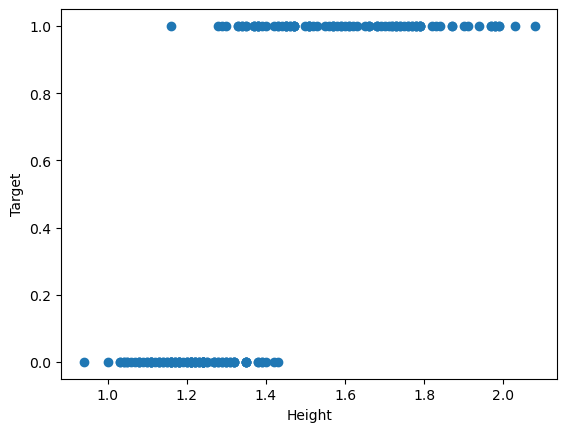

In [18]:
import numpy as np
import matplotlib.pyplot as plt
import torch

data = torch.from_numpy(np.loadtxt("../data/age_data_3.txt"))
x, targets = data.T
plt.scatter(x, targets)
plt.xlabel("Height")
plt.ylabel("Target")

## Definição do modelo

Text(0, 0.5, '$P(c=1 | x)$')

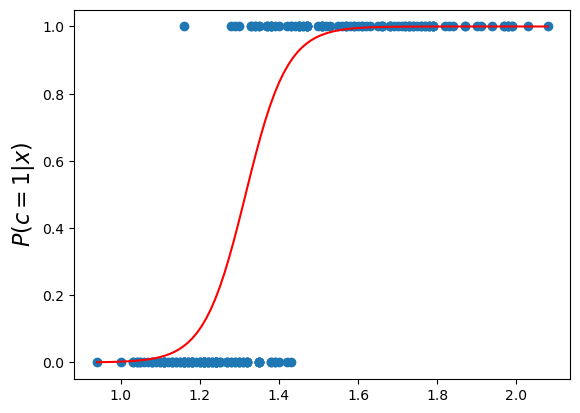

In [16]:
class Model:
    def __init__(self, a, b, requires_grad=False):
        self.a = torch.tensor(a, requires_grad=requires_grad)
        self.b = torch.tensor(b, requires_grad=requires_grad)

    def __call__(self, x):
        return self.a * x + self.b

    def parameters(self):
        return self.a, self.b

    def zero_grad(self):
        for parameter in self.parameters():
            parameter.grad = None

def sigmoid(x):
    return 1 / (1 + torch.exp(-x))

model = Model(a=19., b=-25.)
scores = model(x)
probs = sigmoid(scores)

xm = torch.linspace(x.min(), x.max(), 100)
scoresm = model(xm)
probsm = sigmoid(scoresm)

plt.scatter(x, targets)
plt.plot(xm, probsm, c="r")
plt.ylabel("$P(c=1 | x)$", size=16)

In [19]:
def accuracy(preds, targets):
    return torch.sum(preds == targets) / len(preds)

preds = probs > 0.5
accuracy(preds, targets)

tensor(0.9000)

## Função verossimilhança

In [22]:
def prob_of_target(probs, targets):
    return probs * targets + (1 - probs) * (1 - targets)

def likelihood(probs, targets):
    probs_correct = prob_of_target(probs, targets)
    return torch.prod(probs_correct)

likelihood(probs, targets)

tensor(2.2591e-20, dtype=torch.float64)

In [24]:
def nll(probs, targets):
    probs_correct = prob_of_target(probs, targets)
    probs_log = torch.log(probs_correct)
    return -torch.sum(probs_log)

nll(probs, targets)

tensor(45.2367, dtype=torch.float64)

# Entropia cruzada

In [25]:
def cross_entropy(scores, targets):
    probs = sigmoid(scores)
    probs_correct = prob_of_target(probs, targets)
    probs_log = torch.log(probs_correct)

    return -torch.mean(probs_log)

cross_entropy(scores, targets)

tensor(0.2262, dtype=torch.float64)

## Otimização do modelo

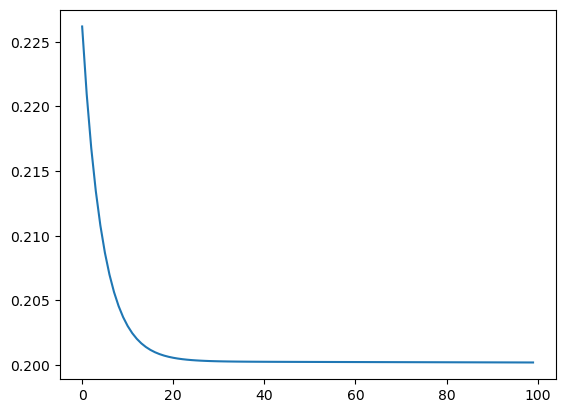

In [26]:
def step(model, x, targets, learning_rate):
    model.zero_grad()
    scores = model(x)
    loss = cross_entropy(scores, targets)
    loss.backward()
    
    with torch.no_grad():
        for p in model.parameters():
            p -= learning_rate * p.grad
            
    return loss.item()


model = Model(19., -25., requires_grad=True)
num_epochs = 100
learning_rate = 0.5
losses = []

for epoch in range(num_epochs):
    loss = step(model, x, targets, learning_rate)
    losses.append(loss)

plt.plot(losses)